In [6]:
os.getcwd()

'/Users/gregoryboyer/Documents/DataScience/Code for SF Analytics/workbooks'

In [4]:
import os
import logging
import pandas as pd
from slack_sdk import WebClient  # Import WebClient from Python SDK (github.com/slackapi/python-slack-sdk)
import time
import matplotlib.pyplot as plt
import numpy as np

## Read Conversations

conversations = pd.read_csv('..data/conversations_history.csv')

## Read Users

#users = pd.read_csv('~/workspace/analytics/data/user_list_data.csv')

## Read Channels

#channels = pd.read_csv('~/workspace/analytics/data/channels.csv')



FileNotFoundError: [Errno 2] File ..data/conversations_history.csv does not exist: '..data/conversations_history.csv'

In [6]:
# Find Last 50 MActive Users

conversations_max = conversations.groupby(['user'], as_index = False).agg({'ts':'max'})
conversations_max.sort_values(by = 'ts', ascending = False, inplace = True)
conversations_joined = pd.merge(conversations_max, users, how = 'left', left_on = ['user'], right_on = ['id'])

conversations_joined[["user", "ts"]].head()


,user,ts
0,U02DL728MQR,2021-10-04 23:26:52.052299976
1,U02HB9WKA80,2021-10-04 23:23:08.041500092
2,U02GX9HUN8Y,2021-09-30 14:11:02.000200033
3,UJSRTPXV5,2021-09-30 06:31:24.031599997
4,UP84C9TU0,2021-09-30 05:02:02.029400110


/var/folders/gb/vkkwn_y50qlcw8ck_mh4lbb00000gn/T/ipykernel_1372/1296441084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_join['ts'] = pd.to_datetime(general_join['ts'])


<AxesSubplot:title={'center':'~40 members join per month'}, xlabel='ts'>

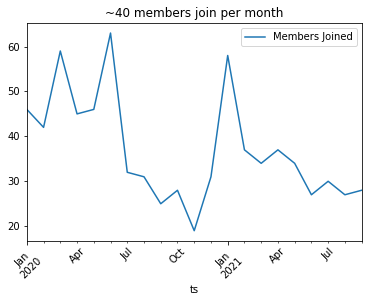

In [89]:
# Weekly Joins to General

general_join = conversations[(conversations['channel'] == 'C0431NL8L') & (conversations['text'].str.contains('joined the channel', na=False))]
general_join['ts'] = pd.to_datetime(general_join['ts'])

monthly = general_join.groupby([pd.Grouper(key='ts', freq='M')])['user'].count().reset_index().sort_values("ts", ascending = False)


monthly_2020 = monthly[(monthly["ts"] > '2020-01-01') & (monthly["ts"] < '2021-10-01')]
monthly_2020.plot(kind = 'line', x = 'ts', y = 'user', rot = 45, label = 'Members Joined', title = '~40 members join per month')


In [88]:
monthly_2020['user'].mean()

37.095238095238095

<AxesSubplot:>

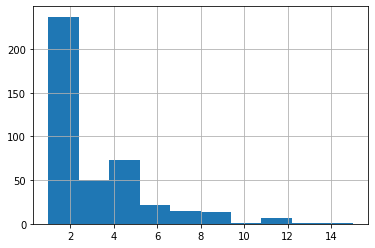

In [107]:
new_users = general_join[general_join['ts'] >= '2020-01-01']['user'].unique()
secondary_join = conversations[(~conversations['channel'].isin(['C0431NL8L', 'C0431NL8N', 'C0447RR86', 'C08NFNDB6', 'CVBEUJFCN', 'C010189P0LU'])) & (conversations['text'].str.contains('joined the channel', na=False))]

funneled_users = secondary_join[(secondary_join['ts'] >= '2020-01-01') & (secondary_join["user"].isin(new_users))]

user_counts = funneled_users.groupby(["user"])["channel"].count().reset_index()

user_counts["channel"].hist()


In [118]:
len(user_counts)

419